In [23]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

In [37]:
%run Accuracy_Module.py
%run DataLoading.py
%run load_and_organize_dataset.py
%run training_module.py

In [3]:
train_loader, val_loader, test_loader = load_dataset(32)

In [5]:
class conv_net(nn.Module):
    def __init__(self):
        super(conv_net, self).__init__()
        self.name = "cnn"
        self.conv1 = nn.Conv2d(3, 12, 5) 
        self.pool1 = nn.MaxPool2d(5, 5)
        self.conv2 = nn.Conv2d(12, 48, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(48, 96, 5)
        self.fc1 = nn.Linear(3456, 3456)
        self.fc2 = nn.Linear(3456, 1024)
        self.fc3 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 1)
    def forward(self, x):
        x = x.cuda()
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        x = x.squeeze(1)
        
        return x

0.00% complete for this epoch
18.87% complete for this epoch
37.74% complete for this epoch
56.60% complete for this epoch
75.47% complete for this epoch
94.34% complete for this epoch
Epoch: 1, Training Loss: 0.981, Training R^2: 0.006, Validation R^2: 0.010
113.21% complete for this epoch
132.08% complete for this epoch
150.94% complete for this epoch
169.81% complete for this epoch
188.68% complete for this epoch
Epoch: 2, Training Loss: 34.208, Training R^2: 0.059, Validation R^2: 0.064
207.55% complete for this epoch
226.42% complete for this epoch
245.28% complete for this epoch
264.15% complete for this epoch
283.02% complete for this epoch
Epoch: 3, Training Loss: 1.822, Training R^2: 0.175, Validation R^2: 0.179
301.89% complete for this epoch
320.75% complete for this epoch
339.62% complete for this epoch
358.49% complete for this epoch
377.36% complete for this epoch
396.23% complete for this epoch
Epoch: 4, Training Loss: 4.870, Training R^2: 0.335, Validation R^2: 0.336
41

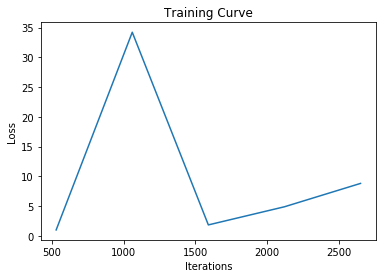

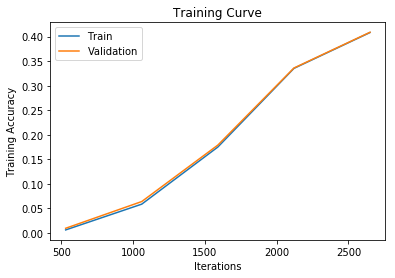

Final Training R^2: 0.40828192234039307
Final Validation R^2: 0.40884125232696533
Finished Training
Total time elapsed: 491.55 seconds


In [38]:
model = conv_net()
model.cuda()
train_net(model, train_loader, val_loader, batch_size=32, learning_rate=1e-5, num_epochs=5)

+/- 1 years accuracy: 19.58%
+/- 5 years accuracy: 69.27%
+/- 10 years accuracy: 88.58%


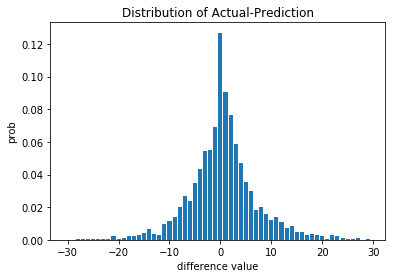

In [18]:
get_off_accuracy(vgg_class, test_loader)

+/- 1 years accuracy: 18.93%
+/- 5 years accuracy: 67.63%
+/- 10 years accuracy: 88.88%


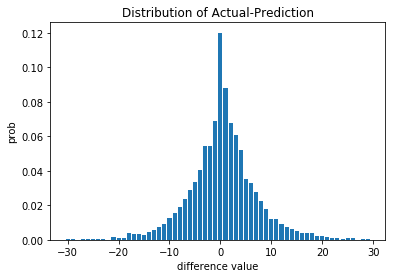

In [19]:
get_off_accuracy(vgg_class, val_loader)

+/- 1 years accuracy: 29.74%
+/- 5 years accuracy: 92.92%
+/- 10 years accuracy: 99.33%


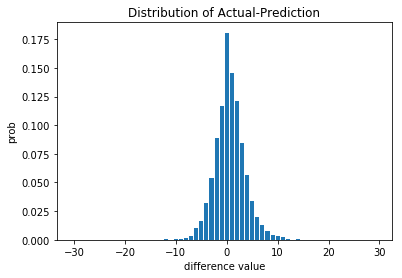

In [20]:
get_off_accuracy(vgg_class, train_loader)

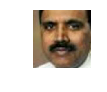

tensor(42) tensor(52.2246, device='cuda:0', grad_fn=<SelectBackward>)


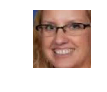

tensor(28) tensor(24.5967, device='cuda:0', grad_fn=<SelectBackward>)


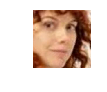

tensor(46) tensor(25.0908, device='cuda:0', grad_fn=<SelectBackward>)


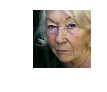

tensor(79) tensor(81.9969, device='cuda:0', grad_fn=<SelectBackward>)


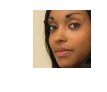

tensor(25) tensor(24.2676, device='cuda:0', grad_fn=<SelectBackward>)


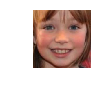

tensor(7) tensor(10.1371, device='cuda:0', grad_fn=<SelectBackward>)


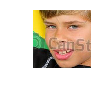

tensor(9) tensor(12.1898, device='cuda:0', grad_fn=<SelectBackward>)


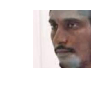

tensor(44) tensor(45.9338, device='cuda:0', grad_fn=<SelectBackward>)


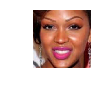

tensor(39) tensor(31.9469, device='cuda:0', grad_fn=<SelectBackward>)


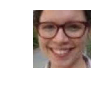

tensor(27) tensor(16.6936, device='cuda:0', grad_fn=<SelectBackward>)


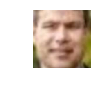

tensor(44) tensor(32.9108, device='cuda:0', grad_fn=<SelectBackward>)


In [33]:
k = 0
for image, label in test_loader:
    img = image[0]
    img = np.transpose(img, [1,2,0])
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    k += 1
    print(label[0], vgg_class(image)[0])
    if k > 10:
        break